In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set()

In [9]:
def inv_linear(x,a,b):
    spec_constant = 283.2
    return a/(x-spec_constant) + b
def chi_square_red(x, y, yerr, modelfunc, p_opt):
    numerator = (y - modelfunc(x, *p_opt)) ** 2
    denominator = yerr ** 2
    chi = sum(numerator / denominator)
    chired = chi / (len(y) - len(p_opt))
    return chired
def fitting(function,xdata,ydata,  guess,sigma = 0):
    if type(sigma) is int:
        fit_opt, fit_cov = curve_fit(function,xdata,ydata, p0=guess)
    else:
        fit_opt, fit_cov = curve_fit(function,xdata,ydata, p0=guess, sigma = sigma, absolute_sigma = True)
    return function(xdata,*fit_opt), fit_opt, fit_cov 

In [10]:
helium_data = np.loadtxt('helium.csv', delimiter=',', usecols=(0,1), unpack=True)
spec_constant = 283.2

Text(0.5, 0, 'wavelength (nm)')

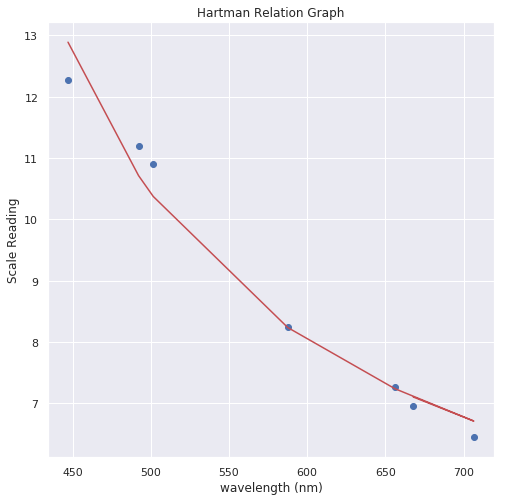

In [11]:
plt.figure(figsize = (8,8))
plt.scatter(helium_data[0],helium_data[1] )
init = (-90,0.3)
fit = fitting(inv_linear,helium_data[0],helium_data[1] ,guess =init)
plt.plot(helium_data[0], fit[0], c = 'r')
plt.title('Hartman Relation Graph')
plt.ylabel('Scale Reading')
plt.xlabel('wavelength (nm)')

In [16]:
def Hartman(specreading):
    # Function which converts a spectrograph reading to a wavelength
    # input is wavelength in nanometers
    m = fit[1][0]
    b = fit[1][1]
    wavelength = m/(specreading - b) + spec_constant
    return(wavelength)

In [18]:
specreading = float(input("What Did the Spectrograph Say?"))
wavelength = Hartman(specreading)
print('Your wavelength is ' + np.str(np.round(wavelength,2)) + ' nm!')

What Did the Spectrograph Say?12.27
Your wavelength is 457.83 nm!
